<a href="https://colab.research.google.com/github/Mike030668/MIPT_magistratura/blob/main/ModNet/LangChain/Evaluete_inference_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/liutiedong/goat.git -q

In [ ]:
!pip install -r /content/goat/requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━

# Test working gradio

In [ ]:
!pip install gradio -q

In [ ]:
import numpy as np
import gradio as gr


def flip_text(x):
    return x[::-1]


def flip_image(x):
    return np.fliplr(x)


with gr.Blocks() as demo:
    gr.Markdown("Flip text or image files using this demo.")
    with gr.Tab("Flip Text"):
        text_input = gr.Textbox()
        text_output = gr.Textbox()
        text_button = gr.Button("Flip")
    with gr.Tab("Flip Image"):
        with gr.Row():
            image_input = gr.Image()
            image_output = gr.Image()
        image_button = gr.Button("Flip")

    with gr.Accordion("Open for More!"):
        gr.Markdown("Look at me...")

    text_button.click(flip_text, inputs=text_input, outputs=text_output)
    image_button.click(flip_image, inputs=image_input, outputs=image_output)

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2890722e788dc1957c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


https://colab.research.google.com/drive/15tiSi_XvSpFC-M0c45lJXOwDPgjDSrK9?usp=sharing

https://github.com/liutiedong/goat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys

import fire
import gradio as gr
import torch
import transformers
from peft import PeftModel
from transformers import GenerationConfig, LlamaForCausalLM, LlamaTokenizer

import warnings
warnings.filterwarnings("ignore")


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching /usr/local/cuda/lib64...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: /usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('http'), PosixPath('//172.28.0.1')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--logtostderr --listen_host=172.28.0.12 --target_host=172.28.0.12 --tunnel_background_sa

In [ ]:
from typing import Union

class Prompter(object):

    def generate_prompt(
        self,
        instruction: str,
        label: Union[None, str] = None,
    ) -> str:

        res = f"{instruction}\nAnswer: "

        if label:
            res = f"{res}{label}"

        return res

    def get_response(self, output: str) -> str:
        return output.split("Answer:")[1].strip().replace("/", "\u00F7").replace("*", "\u00D7")


# Checkpoint model

In [ ]:
path = '/content/drive/Othercomputers/My_comp/Документы/МФТИ_Наука_о_данных/Современные_модели_DL/DZ_LangChain'
data_path = path + '/dataset.json'

checkpoint = 2150
checkpoint_path = path + f'/model/checkpoint-{checkpoint}'
checkpoint_path

'/content/drive/Othercomputers/My_comp/Документы/МФТИ_Наука_о_данных/Современные_модели_DL/DZ_LangChain/model/checkpoint-2150'

In [ ]:
import os
import sys

import fire
import torch
import transformers
from peft import PeftModel
from transformers import GenerationConfig, LlamaForCausalLM, LlamaTokenizer

load_8bit = True # for Colab
base_model = "baffo32/decapoda-research-llama-7B-hf"
lora_weights = checkpoint_path


if torch.cuda.is_available():
    DEVICE = "cuda"
else:
    DEVICE = "cpu"



prompter = Prompter()

tokenizer = LlamaTokenizer.from_pretrained('huggyllama/llama-7b')

model = LlamaForCausalLM.from_pretrained(
    base_model,
    load_in_8bit=load_8bit,
    torch_dtype=torch.float16,
    device_map= "auto",
)
model = PeftModel.from_pretrained(
    model,
    lora_weights,
    torch_dtype=torch.float16,
    device_map={"": 0},
)

model.eval()

tokenizer_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/428 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

pytorch_model-00001-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00002-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00003-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00004-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00005-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00006-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00007-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00008-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00009-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00010-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00011-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00012-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00013-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00014-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00015-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00016-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00017-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00018-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00019-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00020-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00021-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00022-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00023-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00024-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00025-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00026-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00027-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00028-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00029-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00030-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00031-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00032-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00033-of-00033.bin:   0%|          | 0.00/524M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(32000, 4096, padding_idx=31999)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): Linear8bitLt(
                in_features=4096, out_features=4096, bias=False
                (lora_dropout): Dropout(p=0.05, inplace=False)
                (lora_A): Linear(in_features=4096, out_features=64, bias=False)
                (lora_B): Linear(in_features=64, out_features=4096, bias=False)
              )
              (k_proj): Linear8bitLt(
                in_features=4096, out_features=4096, bias=False
                (lora_dropout): Dropout(p=0.05, inplace=False)
                (lora_A): Linear(in_features=4096, out_features=64, bias=False)
                (lora_B): Linear(in_features=64, out_features=4096, bias=False)
              )
              (v_proj): Linear8b

# Test_data

In [ ]:
!pip install -q datasets

[]

In [ ]:
def tokenize(prompt, add_eos_token=True):
    result = tokenizer(
        prompt,
        truncation=True,
        max_length=cutoff_len,
        padding=False,
        return_tensors=None,
    )
    if (
        result["input_ids"][-1] != tokenizer.eos_token_id
        and len(result["input_ids"]) < cutoff_len
        and add_eos_token
    ):
        result["input_ids"].append(tokenizer.eos_token_id)
        result["attention_mask"].append(1)

    result["labels"] = result["input_ids"].copy()

    return result

def generate_and_tokenize_prompt(data_point):
    full_prompt = prompter.generate_prompt(
        data_point["instruction"],
        data_point["output"],
    )
    tokenized_full_prompt = tokenize(full_prompt)
    user_prompt = prompter.generate_prompt(
            data_point["instruction"]
        )
    tokenized_user_prompt = tokenize(user_prompt, add_eos_token=False)
    user_prompt_len = len(tokenized_user_prompt["input_ids"])

    tokenized_full_prompt["labels"] = [
        -100
    ] * user_prompt_len + tokenized_full_prompt["labels"][
        user_prompt_len:
    ]  # could be sped up, probably
    return tokenized_full_prompt

In [ ]:
from datasets import load_dataset

cutoff_len=512

data = load_dataset("json", data_files=data_path)
train_val = data["train"].train_test_split(test_size=0.00035, shuffle=True, seed=42)

test_data = (train_val["test"].shuffle().map(generate_and_tokenize_prompt))

Map:   0%|          | 0/108 [00:00<?, ? examples/s]

In [ ]:
test_data

Dataset({
    features: ['instruction', 'answer', 'input', 'output', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 108
})

In [ ]:
#del(texts_together)

#Evaluate model

In [ ]:
!pip install evaluate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
import evaluate
metric = evaluate.load("exact_match")

In [ ]:
def evaluation(
    text,
    temperature=0.1,
    do_sample = True,
    top_p=0.75,
    top_k=40,
    num_beams=2,
    max_new_tokens=512,
    stream_output=True,
    **kwargs,
):
    prompt = prompter.generate_prompt(text)
    inputs = tokenizer(prompt, return_tensors="pt")
    input_ids = inputs["input_ids"].to(DEVICE)

    generation_config = GenerationConfig(
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        num_beams=num_beams,
        **kwargs,
    )

    generate_params = {
        "input_ids": input_ids,
        "generation_config": generation_config,
        "return_dict_in_generate": True,
        "output_scores": True,
        "max_new_tokens": max_new_tokens,
    }

    # Without streaming
    with torch.no_grad():
        generation_output = model.generate(
            input_ids=input_ids,
            generation_config=generation_config,
            return_dict_in_generate=True,
            output_scores=True,
            max_new_tokens=max_new_tokens,
        )
    s = generation_output.sequences[0]
    output = tokenizer.decode(s, skip_special_tokens=True).strip()

    return prompter.get_response(output)

In [ ]:
from tqdm import tqdm_notebook
answers = []
for i in tqdm_notebook(test_data):
    answers.append(evaluation(i['instruction']))

  0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:
texts_together = []
count = 0
for i in test_data['output']:
  for j in answers:
    # if correct answer
    if test_data['output'].index(i) == answers.index(j):
        #j = j.replace('×', '*').replace('÷', '/') # only sum test
        if metric.compute(predictions=[j], references=[i])['exact_match'] == 1.0:
            count += 1
        texts_together.append((i,j,metric.compute(predictions=[j], references=[i]) ))

display(f'Total % of correct answers: {count/len(texts_together)}')
display('=======================')
for i in texts_together:
    display(i)
    display('===========================')

'Total % of correct answers: 0.9629629629629629'

'======================='

('830095294 + 52710981723901 = 52711811819195',
 '830095294 + 52710981723901 = 52711811819195',
 {'exact_match': 1.0})

'==========================='

('715 + 696 = 1411', '715 + 696 = 1411', {'exact_match': 1.0})

'==========================='

('118808216812 + 521042 = 118808737854',
 '118808216812 + 521042 = 118808737854',
 {'exact_match': 1.0})

'==========================='

('464408327 + 806560785 = 1270969112',
 '464408327 + 806560785 = 1270969112',
 {'exact_match': 1.0})

'==========================='

('25270 + 93282194286337 = 93282194311607',
 '25270 + 93282194286337 = 93282194311607',
 {'exact_match': 1.0})

'==========================='

('934131636 + 606733589 = 1540865225',
 '934131636 + 606733589 = 1540865225',
 {'exact_match': 1.0})

'==========================='

('88 + 5 = 93', '88 + 5 = 93', {'exact_match': 1.0})

'==========================='

('89 + 6929893118 = 6929893207',
 '89 + 6929893118 = 6929893207',
 {'exact_match': 1.0})

'==========================='

('61647 + 198851199561 = 198851261208',
 '61647 + 198851199561 = 198851261208',
 {'exact_match': 1.0})

'==========================='

('88409 + 900754370155828 = 900754370244237',
 '88409 + 900754370155828 = 900754370244237',
 {'exact_match': 1.0})

'==========================='

('9052642 + 810907393756 = 810916446398',
 '9052642 + 810907393756 = 810916446398',
 {'exact_match': 1.0})

'==========================='

('8973725838129 + 8018 = 8973725846147',
 '8973725838129 + 8018 = 8973725846147',
 {'exact_match': 1.0})

'==========================='

('12315179 + 97991439339 = 98003754518',
 '12315179 + 97991439339 = 98003754518',
 {'exact_match': 1.0})

'==========================='

('53527614 + 14010 = 53541624',
 '53527614 + 14010 = 53541624',
 {'exact_match': 1.0})

'==========================='

('282123682 + 9715659325484 = 9715941449166',
 '282123682 + 9715659325484 = 9715941449166',
 {'exact_match': 1.0})

'==========================='

('800179 + 861420078 = 862220257',
 '800179 + 861420078 = 862220257',
 {'exact_match': 1.0})

'==========================='

('173069 + 249146667530 = 249146840599',
 '173069 + 249146667530 = 249146840599',
 {'exact_match': 1.0})

'==========================='

('930235715 + 208443890 = 1138679605',
 '930235715 + 208443890 = 1138679605',
 {'exact_match': 1.0})

'==========================='

('5655 + 483430 = 489085', '5655 + 483430 = 489085', {'exact_match': 1.0})

'==========================='

('692070 + 40784333383 = 40785025453',
 '692070 + 40784333383 = 40785025453',
 {'exact_match': 1.0})

'==========================='

('6 + 7 = 13', '6 + 7 = 13', {'exact_match': 1.0})

'==========================='

('377285536 + 75147795860748 = 75148173146284',
 '377285536 + 75147795860748 = 75148173146284',
 {'exact_match': 1.0})

'==========================='

('3183093037 + 45 = 3183093082',
 '3183093037 + 45 = 3183093082',
 {'exact_match': 1.0})

'==========================='

('56993 + 562514853 = 562571846',
 '56993 + 562514853 = 562571846',
 {'exact_match': 1.0})

'==========================='

('67204740666 + 3178881 = 67207919547',
 '67204740666 + 3178881 = 67207919547',
 {'exact_match': 1.0})

'==========================='

('3633853 + 26 = 3633879', '3633853 + 26 = 3633879', {'exact_match': 1.0})

'==========================='

('284049957212 + 2213215 = 284052170427',
 '284049957212 + 2213215 = 284052170427',
 {'exact_match': 1.0})

'==========================='

('92965957627214 + 502303 = 92965958129517',
 '92965957627214 + 502303 = 92965958129517',
 {'exact_match': 1.0})

'==========================='

('35814115 + 84110636 = 119924751',
 '35814115 + 84110636 = 119924751',
 {'exact_match': 1.0})

'==========================='

('3179 + 432158661218 = 432158664397',
 '3179 + 432158661218 = 432158664397',
 {'exact_match': 1.0})

'==========================='

('407838734 + 979861181404577 = 979861589243311',
 '407838734 + 979861181404577 = 979861589243311',
 {'exact_match': 1.0})

'==========================='

('237950670 + 773 = 237951443',
 '237950670 + 773 = 237951443',
 {'exact_match': 1.0})

'==========================='

('4170308194159 + 212275 = 4170308406434',
 '4170308194159 + 212275 = 4170308406434',
 {'exact_match': 1.0})

'==========================='

('737150 + 2393 = 739543', '737150 + 2393 = 739543', {'exact_match': 1.0})

'==========================='

('3 + 19056461 = 19056464', '3 + 19056461 = 19056464', {'exact_match': 1.0})

'==========================='

('9 + 31892484085211 = 31892484085220',
 '9 + 31892484085211 = 31892484085220',
 {'exact_match': 1.0})

'==========================='

('68 + 8700813 = 8700881', '68 + 8700813 = 8700881', {'exact_match': 1.0})

'==========================='

('35567335727 + 960103 = 35568295830',
 '35567335727 + 960103 = 35568295830',
 {'exact_match': 1.0})

'==========================='

('3527934 + 9159373 = 12687307',
 '3527934 + 9159373 = 12687307',
 {'exact_match': 1.0})

'==========================='

('722598240 + 87468237379738 = 87468959977978',
 '722598240 + 87468237379738 = 87468959977978',
 {'exact_match': 1.0})

'==========================='

('75499248226 + 95786824 = 75595035050',
 '75499248226 + 95786824 = 75595035050',
 {'exact_match': 1.0})

'==========================='

('51 + 738700 = 738751', '51 + 738700 = 738751', {'exact_match': 1.0})

'==========================='

('686816196240 + 8077 = 686816204317',
 '686816196240 + 8077 = 686816204317',
 {'exact_match': 1.0})

'==========================='

('671131855588922 + 7336487 = 671131862925409',
 '671131855588922 + 7336487 = 671131862925409',
 {'exact_match': 1.0})

'==========================='

('9654029 + 288972429 = 298626458',
 '9654029 + 288972429 = 298626458',
 {'exact_match': 1.0})

'==========================='

('451722285 + 545890456 = 997612741',
 '451722285 + 545890456 = 997612741',
 {'exact_match': 1.0})

'==========================='

('811 + 385 = 1196', '811 + 385 = 1196', {'exact_match': 1.0})

'==========================='

('86713 + 33905112308 = 33905199021',
 '86713 + 33905112308 = 33905199021',
 {'exact_match': 1.0})

'==========================='

('22971146291 + 93777 = 22971240068',
 '22971146291 + 93777 = 22971240068',
 {'exact_match': 1.0})

'==========================='

('838873 + 60880 = 899753', '838873 + 60880 = 899753', {'exact_match': 1.0})

'==========================='

('40 + 70003 = 70043', '40 + 70003 = 70043', {'exact_match': 1.0})

'==========================='

('94250261 + 849 = 94251110',
 '94250261 + 849 = 94251110',
 {'exact_match': 1.0})

'==========================='

('44806610403319 + 179351192 = 44806789754511',
 '44806610403319 + 179351192 = 44806789754511',
 {'exact_match': 1.0})

'==========================='

('75301394 + 2595590 = 77896984',
 '75301394 + 2595590 = 77896984',
 {'exact_match': 1.0})

'==========================='

('81207 + 9870879494110 = 9870879575317',
 '81207 + 9870879494110 = 9870879575317',
 {'exact_match': 1.0})

'==========================='

('32 + 310196436880834 = 310196436880866',
 '32 + 310196436880834 = 310196436880866',
 {'exact_match': 1.0})

'==========================='

('314042994638 + 877600757 = 314920595395',
 '314042994638 + 877600757 = 314920595395',
 {'exact_match': 1.0})

'==========================='

('9090166 + 25072714179 = 25081804345',
 '9090166 + 25072714179 = 25081804345',
 {'exact_match': 1.0})

'==========================='

('158390 + 887029871437 = 887030029827',
 '158390 + 887029871437 = 887030029827',
 {'exact_match': 1.0})

'==========================='

('90499 + 20633 = 111132', '90499 + 20633 = 111132', {'exact_match': 1.0})

'==========================='

('950 + 33 = 983', '950 + 33 = 983', {'exact_match': 1.0})

'==========================='

('449536990603 + 7059 = 449536997662',
 '449536990603 + 7059 = 449536997662',
 {'exact_match': 1.0})

'==========================='

('781954091641 + 1347113 = 781955438754',
 '781954091641 + 1347113 = 781955438754',
 {'exact_match': 1.0})

'==========================='

('3559755 + 3342509 = 6902264',
 '3559755 + 3342509 = 6902264',
 {'exact_match': 1.0})

'==========================='

('854002472 + 700964227 = 1554966699',
 '854002472 + 700964227 = 1554966709',
 {'exact_match': 0.0})

'==========================='

('26476977889800 + 7254802 = 26476985144602',
 '26476977889800 + 7254802 = 26476985144602',
 {'exact_match': 1.0})

'==========================='

('76401 + 257186840252634 = 257186840329035',
 '76401 + 257186840252634 = 257186840329035',
 {'exact_match': 1.0})

'==========================='

('125 + 9440760423029 = 9440760423154',
 '125 + 9440760423029 = 9440760423154',
 {'exact_match': 1.0})

'==========================='

('1842949 + 398 = 1843347', '1842949 + 398 = 1843347', {'exact_match': 1.0})

'==========================='

('8734420 + 578146114715335 = 578146123449755',
 '8734420 + 578146114715335 = 578146123449755',
 {'exact_match': 1.0})

'==========================='

('95479657 + 425780 = 95905437',
 '95479657 + 425780 = 95905437',
 {'exact_match': 1.0})

'==========================='

('66265 + 664123905 = 664190170',
 '66265 + 664123905 = 664190170',
 {'exact_match': 1.0})

'==========================='

('90298 + 598027554637498 = 598027554727796',
 '90298 + 598027554637498 = 598027554727796',
 {'exact_match': 1.0})

'==========================='

('32609 + 7290426955 = 7290459564',
 '32609 + 7290426955 = 7290459564',
 {'exact_match': 1.0})

'==========================='

('955589690 + 789869665206888 = 789870620796578',
 '955589690 + 789869665206888 = 789870620796578',
 {'exact_match': 1.0})

'==========================='

('1034209515135 + 523225 = 1034210038360',
 '1034209515135 + 523225 = 1034209038360',
 {'exact_match': 0.0})

'==========================='

('35470 + 50937 = 86407', '35470 + 50937 = 86407', {'exact_match': 1.0})

'==========================='

('1686279781308 + 7614083 = 1686287395391',
 '1686279781308 + 7614083 = 1686287395391',
 {'exact_match': 1.0})

'==========================='

('686 + 89 = 775', '686 + 89 = 775', {'exact_match': 1.0})

'==========================='

('49789865 + 66771 = 49856636',
 '49789865 + 66771 = 49856636',
 {'exact_match': 1.0})

'==========================='

('435 + 7878054929 = 7878055364',
 '435 + 7878054929 = 7878055364',
 {'exact_match': 1.0})

'==========================='

('49055 + 260515041210 = 260515090265',
 '49055 + 260515041210 = 260515090265',
 {'exact_match': 1.0})

'==========================='

('337427173 + 5400777 = 342827950',
 '337427173 + 5400777 = 342827950',
 {'exact_match': 1.0})

'==========================='

('595867054 + 3351356722238 = 3351952589292',
 '595867054 + 3351356722238 = 3351952589292',
 {'exact_match': 1.0})

'==========================='

('534 + 601 = 1135', '534 + 601 = 1135', {'exact_match': 1.0})

'==========================='

('6887377 + 62872 = 6950249',
 '6887377 + 62872 = 6950249',
 {'exact_match': 1.0})

'==========================='

('12896922 + 752438379 = 765335301',
 '12896922 + 752438379 = 765335301',
 {'exact_match': 1.0})

'==========================='

('63120302 + 82707263716 = 82770384018',
 '63120302 + 82707263716 = 82770384018',
 {'exact_match': 1.0})

'==========================='

('6874077 + 136771834604749 = 136771841478826',
 '6874077 + 136771834604749 = 136771841478826',
 {'exact_match': 1.0})

'==========================='

('7463 + 8 = 7471', '7463 + 8 = 7471', {'exact_match': 1.0})

'==========================='

('6874891 + 58928855 = 65803746',
 '6874891 + 58928855 = 65803746',
 {'exact_match': 1.0})

'==========================='

('67364125755 + 89313886 = 67453439641',
 '67364125755 + 89313886 = 67453439641',
 {'exact_match': 1.0})

'==========================='

('719 + 26862 = 27581', '719 + 26862 = 27581', {'exact_match': 1.0})

'==========================='

('43199973735 + 27847 = 43200001582',
 '43199973735 + 27847 = 43199976522',
 {'exact_match': 0.0})

'==========================='

('54676 + 8316718132747 = 8316718187423',
 '54676 + 8316718132747 = 8316718187423',
 {'exact_match': 1.0})

'==========================='

('9729336829652 + 196 = 9729336829848',
 '9729336829652 + 196 = 9729336829848',
 {'exact_match': 1.0})

'==========================='

('618 + 9723918133991 = 9723918134609',
 '618 + 9723918133991 = 9723918134609',
 {'exact_match': 1.0})

'==========================='

('72410676321 + 1 = 72410676322',
 '72410676321 + 1 = 72410676322',
 {'exact_match': 1.0})

'==========================='

('393248945 + 74011 = 393322956',
 '393248945 + 74011 = 393322956',
 {'exact_match': 1.0})

'==========================='

('54924551162 + 1 = 54924551163',
 '54924551162 + 1 = 54924551163',
 {'exact_match': 1.0})

'==========================='

('3520 + 66277205138756 = 66277205142276',
 '3520 + 66277205138756 = 66277205142276',
 {'exact_match': 1.0})

'==========================='

('3050961 + 48098904002142 = 48098907053103',
 '3050961 + 48098904002142 = 48098907053103',
 {'exact_match': 1.0})

'==========================='

('20217797797 + 9575536 = 20227373333',
 '20217797797 + 9575536 = 20227373333',
 {'exact_match': 1.0})

'==========================='

('6277239 + 62709 = 6339948',
 '6277239 + 62709 = 6340948',
 {'exact_match': 0.0})

'==========================='

('579016 + 571555068852142 = 571555069431158',
 '579016 + 571555068852142 = 571555069431158',
 {'exact_match': 1.0})

'==========================='

('2830748468485 + 94881 = 2830748563366',
 '2830748468485 + 94881 = 2830748563366',
 {'exact_match': 1.0})

'==========================='

('52 + 5510372 = 5510424', '52 + 5510372 = 5510424', {'exact_match': 1.0})

'==========================='

('30076 + 9368481854 = 9368511930',
 '30076 + 9368481854 = 9368511930',
 {'exact_match': 1.0})

'==========================='

In [ ]:
#del model
import gc
import torch
gc.collect()
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 6            |        cudaMalloc retries: 8         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   7089 MiB |  12914 MiB |   2002 GiB |   1995 GiB |\n|       from large pool |   6790 MiB |  12615 MiB |   1320 GiB |   1313 GiB |\n|       from small pool |    299 MiB |    549 MiB |    681 GiB |    681 GiB |\n|---------------------------------------------------------------------------|\n| Active memory         |   7089 MiB |  12914 MiB |   2002 GiB |   1995 GiB |\n|       from large pool |   6790 MiB |  12615 MiB |

#Gradio inference model

In [ ]:

gr.Interface(

    fn=evaluation,

    inputs=[
        gr.Textbox(
            lines=1,
            label="Arithmetic",
            placeholder="What is 63303235 + 20239503",
        ),
    gr.Slider(
        minimum=0, maximum=1, value=0.1, label="Temperature"
    ),
    gr.Slider(
        minimum=0, maximum=1, value=0.75, label="Top p"
    ),
    gr.Slider(
        minimum=0, maximum=100, step=1, value=40, label="Top k"
    ),
    gr.Slider(
        minimum=1, maximum=512, step=1, value=512, label="Max tokens"
    ),
    ],

    outputs=[gr.Textbox(
            lines=5,
            label="Output",
        )
    ],

    title="Goat-7B arifmetic",
    description="Goat-7B is a LLaMA-7B model fine-tuned on a synthetic dataset arifmetic data",  # noqa: E501
).launch(debug=True, share = True)#server_name="0.0.0.0", share=share_gradio) .queue()

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://1b72968650daf22a92.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://1b72968650daf22a92.gradio.live


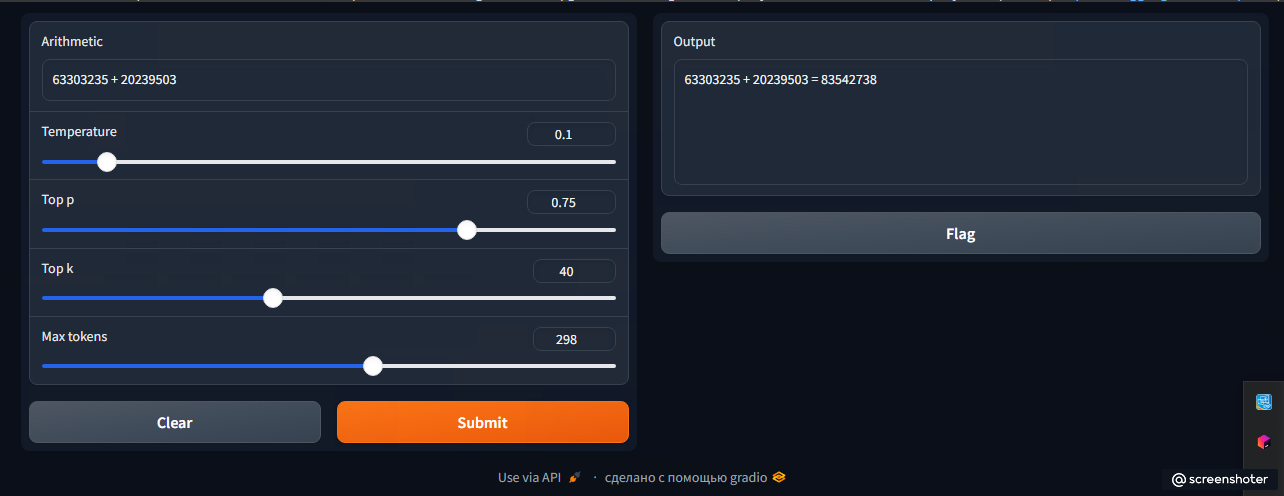

Стало понятно ограничение по модели в задании, которое заметил поздно.

Пришлось поудалять все переменные ненужные чтобы очистить место по инференс....

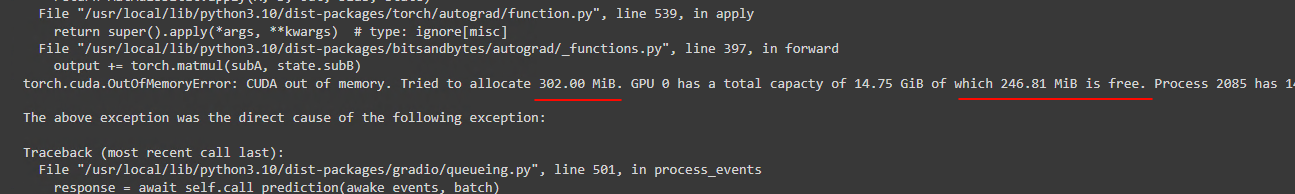